In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import gc
from datetime import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tqdm import tqdm

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [3]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)


# Files/folders/parameters

In [4]:
# Simulation and observation data folder
f_ats_data  = Path('./Jiang2023/data/ensemble_396')
f_ats_precip = Path('./Jiang2023/data/CC_prcp-2015-2019.csv')
f_data = Path('./data')

# ATS parameter data
f_para    = os.path.join(f_ats_data, 'ensemble_parameter_updated.csv')

# ATS  simulation data
f_q   = os.path.join(f_ats_data, 'ensemble_q_all_396.csv') # streamflow


# Load ATS data/parameters

In [5]:
# Load the parameter
df_para  = pd.read_csv(f_para, index_col = 0)
para_set = list(df_para.keys())
df_para.head()


,priestley_taylor_alpha-snow,priestley_taylor_alpha-transpiration,snowmelt_rate,snowmelt_degree_diff,perm_s3,perm_s4,perm_g1,perm_g4
realization_id,,,,,,,,
1,0.7500,0.7500,3.42500,3.0,-11.709965,-11.324222,-12.500313,-13.00
2,0.9750,0.5250,2.39750,2.0,-11.209965,-10.824222,-13.000313,-12.50
3,0.5250,0.9750,4.45250,4.0,-12.209965,-11.824222,-12.000313,-13.50
4,0.6375,0.6375,3.93875,4.5,-11.959965,-12.074222,-12.750313,-12.25
5,1.0875,1.0875,1.88375,2.5,-10.959965,-11.074222,-11.750313,-13.25


In [6]:
# Load ATS data
df_q   = pd.read_csv(f_q, index_col = 0)
df_q.shape


(1463, 397)

In [7]:
# Remove 2016-12-31 which ATS does not simulate
if '2016-12-31' in df_q.index:
    df_q = df_q.drop('2016-12-31')
# Get the logarithm of Q
df_logq= np.log10(df_q)

# All variables starting from 2015-10-02 to get rid of the initial zeros
df_logq = df_logq.iloc[1:]

# Number of realizations
realz  = list(df_logq.keys())
nrealz = len(realz)
nrealz


/global/cfs/cdirs/m1800/peishi/.conda/envs/kim/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


397

In [8]:
# Get the ensemble index
ens = list(df_logq.dropna(axis='columns').keys())
ens_str = [e for e in ens if 'ens' in e]
ens_num = [int(e.split('.')[1]) for e in ens if 'ens' in e]
print(ens_num)

[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260

In [9]:
# Get the ensemble
ensemble_inputs  = df_para.loc[ens_num,:]
ensemble_outputs = df_logq[ens_str].T


In [10]:
ensemble_outputs.head()

,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,2015-10-11,...,2019-09-23,2019-09-24,2019-09-25,2019-09-26,2019-09-27,2019-09-28,2019-09-29,2019-09-30,2019-10-01,2019-10-02
ens.51,5.129698,4.626144,4.331208,4.265447,4.578950,4.546641,4.337664,4.259503,4.235582,4.207995,...,3.981300,3.980271,3.992923,4.008735,4.001246,3.987468,3.977982,3.969912,3.957986,3.946545
ens.52,5.124909,4.561925,4.169992,4.058005,4.274430,4.327589,4.097415,4.017729,3.983354,3.952110,...,3.549707,3.521203,3.478916,3.447924,3.431452,3.429977,3.419128,3.396312,3.374553,3.351322
ens.53,5.167135,4.852130,4.711002,4.723129,4.903345,4.821576,4.710737,4.682207,4.665111,4.640851,...,4.007494,4.013700,4.033696,4.036611,4.019522,4.004824,3.995179,3.986332,3.973695,3.961471
ens.54,5.226466,5.032107,4.923423,4.913343,5.002032,4.921044,4.828777,4.788990,4.753907,4.713308,...,4.259889,4.284120,4.294335,4.275020,4.242473,4.225079,4.220711,4.199824,4.180199,4.162824
ens.55,5.236408,5.094033,5.030661,5.043561,5.130504,5.059649,4.999233,4.985469,4.972059,4.953786,...,4.251468,4.275530,4.278465,4.267014,4.248403,4.241904,4.239907,4.227322,4.216386,4.204373


In [11]:
ensemble_inputs.head()

,priestley_taylor_alpha-snow,priestley_taylor_alpha-transpiration,snowmelt_rate,snowmelt_degree_diff,perm_s3,perm_s4,perm_g1,perm_g4
realization_id,,,,,,,,
51,0.595312,1.185938,1.562656,4.5625,-12.366215,-11.667972,-12.469063,-13.59375
52,0.707812,0.623437,3.103906,4.0625,-12.616215,-11.917972,-13.219063,-12.84375
53,1.157812,1.073437,5.158906,2.0625,-11.616215,-10.917972,-12.219063,-13.84375
54,0.932812,0.398438,2.076406,3.0625,-11.116215,-10.417972,-12.719063,-13.34375
55,0.482812,0.848437,4.131406,1.0625,-12.116215,-11.417972,-11.719063,-12.34375


# Plot

In [12]:
flow = ensemble_outputs.T
flow.index = pd.to_datetime(flow.index)


/tmp/ipykernel_1969943/3380954254.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15);


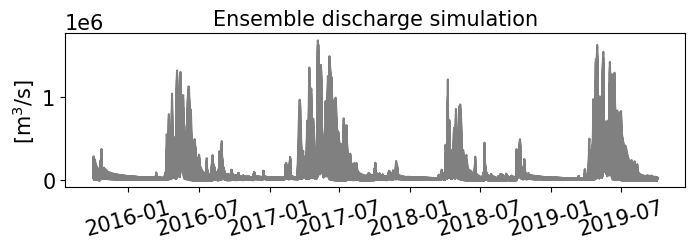

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,2))
for ens in ens_str:
    ax.plot(flow.index, np.power(10, flow[ens].values), 'grey')
    ax.set(title='Ensemble discharge simulation', ylabel='[m$^3$/s]')
ax.set_xticklabels(ax.get_xticklabels(), rotation=15);
    

# Save the ensemble

In [ ]:
ensemble_inputs.to_csv(f_data / 'Output_para.csv')
ensemble_outputs.to_csv(f_data / 'Input_logq.csv')
